# Mining the 20 Newsgroups Dataset
with Text Analysis Techniques

In [22]:
import nltk

In [39]:
from nltk.corpus import names
print(names.words()[:10])
len(names.words())

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale']


7944

## Tokenization
<div>
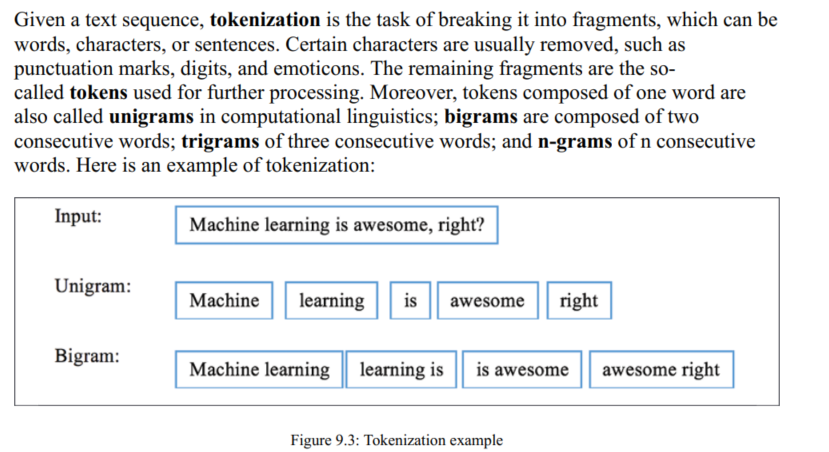
</div>

In [32]:
from nltk.tokenize import word_tokenize, sent_tokenize

line = '''Given a text sequence, tokenization is the task of breaking it into fragments, which can bewords, characters, or sentences. 
Certain characters are usually removed, such aspunctuation marks, digits, and emoticons.'''

print("Word Tokenize" , word_tokenize(line), "\n")
print("Sentense Tokenize", sent_tokenize(line))

Word Tokenize ['Given', 'a', 'text', 'sequence', ',', 'tokenization', 'is', 'the', 'task', 'of', 'breaking', 'it', 'into', 'fragments', ',', 'which', 'can', 'bewords', ',', 'characters', ',', 'or', 'sentences', '.', 'Certain', 'characters', 'are', 'usually', 'removed', ',', 'such', 'aspunctuation', 'marks', ',', 'digits', ',', 'and', 'emoticons', '.'] 

Sentense Tokenize ['Given a text sequence, tokenization is the task of breaking it into fragments, which can bewords, characters, or sentences.', 'Certain characters are usually removed, such aspunctuation marks, digits, and emoticons.']


### POS Tagging

In [37]:
tokens = word_tokenize(line)
print(pos_tag(tokens))

[('Given', 'VBN'), ('a', 'DT'), ('text', 'NN'), ('sequence', 'NN'), (',', ','), ('tokenization', 'NN'), ('is', 'VBZ'), ('the', 'DT'), ('task', 'NN'), ('of', 'IN'), ('breaking', 'VBG'), ('it', 'PRP'), ('into', 'IN'), ('fragments', 'NNS'), (',', ','), ('which', 'WDT'), ('can', 'MD'), ('bewords', 'VB'), (',', ','), ('characters', 'NNS'), (',', ','), ('or', 'CC'), ('sentences', 'NNS'), ('.', '.'), ('Certain', 'NN'), ('characters', 'NNS'), ('are', 'VBP'), ('usually', 'RB'), ('removed', 'VBN'), (',', ','), ('such', 'JJ'), ('aspunctuation', 'NN'), ('marks', 'NNS'), (',', ','), ('digits', 'NNS'), (',', ','), ('and', 'CC'), ('emoticons', 'NNS'), ('.', '.')]


In [42]:
nltk.help.upenn_tagset('CC')

CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet


### NER
Given a text sequence, the NER task is to locate and identify words or phrases that are of
definitive categories, such as names of persons, companies, locations, and dates. 

### Stemming and lemmatization


In [48]:
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()
print(porter_stemmer.stem("Machines"))
print(porter_stemmer.stem("flabbergasted"))

machin
flabbergast


In [57]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("Machine"))
print(lemmatizer.lemmatize("flabbergasted"))

# Why is learning unchanged? It turns out that this algorithm only lemmatizes on nouns
# by default.'''

Machine
flabbergasted


# 20 NewsGroup Dataset

In [8]:
from sklearn.datasets import fetch_20newsgroups

In [9]:
groups = fetch_20newsgroups()

In [10]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [11]:
from pprint import pprint
pprint(groups)

{'DESCR': '.. _20newsgroups_dataset:\n'
          '\n'
          'The 20 newsgroups text dataset\n'
          '------------------------------\n'
          '\n'
          'The 20 newsgroups dataset comprises around 18000 newsgroups posts '
          'on\n'
          '20 topics split in two subsets: one for training (or development)\n'
          'and the other one for testing (or for performance evaluation). The '
          'split\n'
          'between the train and test set is based upon a messages posted '
          'before\n'
          'and after a specific date.\n'
          '\n'
          'This module contains two loaders. The first one,\n'
          ':func:`sklearn.datasets.fetch_20newsgroups`,\n'
          'returns a list of the raw texts that can be fed to text feature\n'
          'extractors such as '
          ':class:`~sklearn.feature_extraction.text.CountVectorizer`\n'
          'with custom parameters so as to extract feature vectors.\n'
          'The second one, '
       

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [90]:
len(groups['data'])

11314

In [100]:
groups['data'][0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [94]:
# The target_names key gives the newsgroups names:

groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [99]:
# The target key corresponds to a newsgroup, but is encoded as an integer:
print(len(groups['target']))
groups.target

11314


array([7, 4, 4, ..., 3, 1, 8])

In [61]:
# Then, what are the distinct values for these integers? We can use the unique function
# from NumPy to figure it out:
import numpy as np
np.unique(groups.target, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377], dtype=int64))

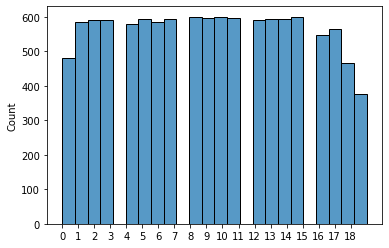

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.histplot(groups['target'])
ax.set_xticks(range(19), labels=range(0, 19))
plt.show()

In [134]:
## 5th data file which category?
tar = 8
print(groups.target_names[groups.target[tar]], "\n")

# True?? Yes
print(groups['data'][tar])

comp.os.ms-windows.misc 

From: holmes7000@iscsvax.uni.edu
Subject: WIn 3.0 ICON HELP PLEASE!
Organization: University of Northern Iowa
Lines: 10

I have win 3.0 and downloaded several icons and BMP's but I can't figure out
how to change the "wallpaper" or use the icons.  Any help would be appreciated.


Thanx,

-Brando

PS Please E-mail me




### Bag of Words (BoW)
We begin by converting documents into a matrix where each row represents each
newsgroup document and each column represents a word token, or specifically, a unigram
to begin with. And the value of each element in the matrix is the number of times the word
(column) occurs in the document (row). 

<div>
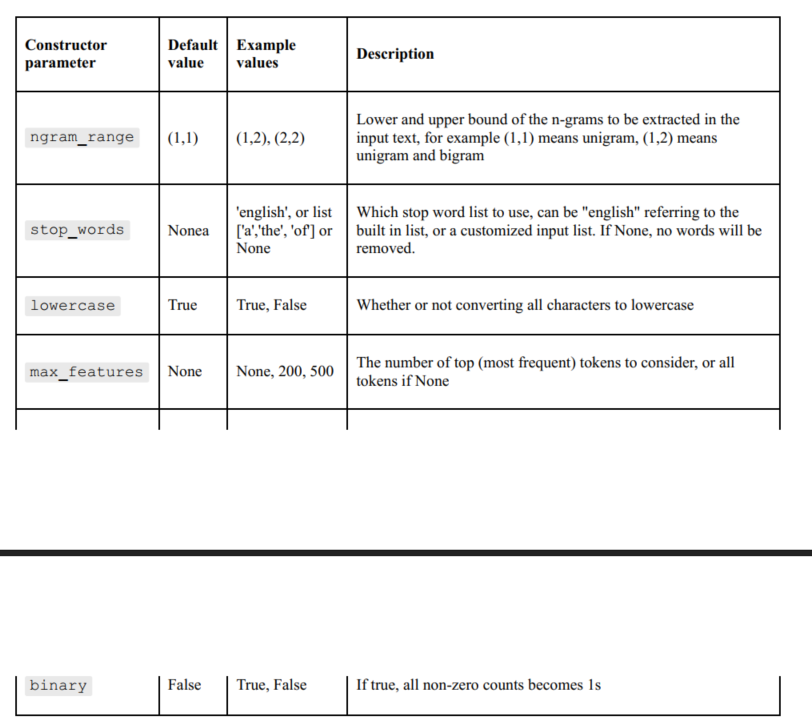
</div>

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(max_features=500)
data_count = count_vector.fit_transform(groups.data)

data_count

<11314x500 sparse matrix of type '<class 'numpy.int64'>'
	with 798221 stored elements in Compressed Sparse Row format>

In [16]:
data_count[3]

<1x500 sparse matrix of type '<class 'numpy.int64'>'
	with 57 stored elements in Compressed Sparse Row format>

In [150]:
data_count.toarray()[3]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [164]:
dat = data_count.toarray()[3] 

count = [i for i in dat if i > 0]
len(count) #matches line above

57

In [167]:
count_vector.get_feature_names_out()

array(['00', '000', '10', '100', '11', '12', '13', '14', '145', '15',
       '16', '17', '18', '19', '1993', '20', '21', '22', '23', '24', '25',
       '26', '27', '30', '32', '34', '40', '50', '93', 'a86', 'able',
       'about', 'above', 'ac', 'access', 'actually', 'address', 'after',
       'again', 'against', 'ago', 'all', 'already', 'also', 'always',
       'am', 'american', 'an', 'and', 'andrew', 'another', 'answer',
       'any', 'anyone', 'anything', 'apple', 'apr', 'april', 'are',
       'armenian', 'around', 'article', 'as', 'ask', 'at', 'au',
       'available', 'away', 'ax', 'b8f', 'back', 'bad', 'based', 'be',
       'because', 'been', 'before', 'being', 'believe', 'best', 'better',
       'between', 'bible', 'big', 'bill', 'bit', 'book', 'both', 'but',
       'buy', 'by', 'ca', 'call', 'called', 'came', 'can', 'canada',
       'cannot', 'car', 'card', 'case', 'cc', 'center', 'change',
       'children', 'chip', 'christian', 'clipper', 'co', 'code', 'color',
       'com', 

Our first trial doesn't look perfect. Obviously, the most popular tokens are numbers, or
letters with numbers such as a86 , which do not convey important information. Moreover,
there are many words that have no actual meaning, such as you , the , them , and then .

Also, some words contain identical information, forexample, tell and told , use and used , and time and times . Let's tackle these
issues.

## Text  Processing

In [17]:
# Only include ALPHABETS

data_cleaned = []
for doc in groups.data:
    only_alpha = [word for word in doc.split() if word.isalpha()]
    doc_cleaned = ' '.join(only_alpha)
    
    data_cleaned.append(doc_cleaned)
data_cleaned[1]

'SI Clock Poll Final Call Final call for SI clock reports University of Washington A fair number of brave souls who upgraded their SI clock oscillator have shared their experiences for this Please send a brief message detailing your experiences with the Top speed CPU rated add on cards and heat hour of usage per floppy disk functionality with and m floppies are especially I will be summarizing in the next two so please add to the network knowledge base if you have done the clock upgrade and answered this Guy Kuo'

### Stop Words

In [18]:
count_vector_sw = CountVectorizer(stop_words="english", max_features=500)

In [49]:
#nltk.download('names')
nltk.download('omw-1.4')
# To get rid of the common names

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dip2l\AppData\Roaming\nltk_data...


True

## FINAL 
Putting all of these: 
   * preprocessing, 
   * dropping stop words, 
   * lemmatizing, and 
   * count vectorizing 
together, we obtain the following:

In [50]:
from nltk.corpus import names
all_names = set(names.words())

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data_cleaned = []

for doc in groups.data:
    doc = doc.lower()
    only_alpha = [lemmatizer.lemmatize(word) 
                  for word in doc.split() 
                  if word.isalpha() and 
                  word not in all_names]
    doc_cleaned = ' '.join(only_alpha)
    
    data_cleaned.append(doc_cleaned)


In [51]:
data_cleaned[3]

'weitek harris computer system division world tin robert kyanko writes in article anyone know about the weitek graphic a far a the stuff it look pretty got this quadrilateral fill command that requires just the four do you have like to get some information about this joe green harris corporation computer system division only thing that really scare me is a person with no sense of jonathan winter'

### Count Vectorizing

In [52]:
count_vector_sw = CountVectorizer(stop_words="english", max_features=500)
data_cleaned_count = count_vector_sw.fit_transform(data_cleaned)

In [53]:
count_vector_sw.get_feature_names_out()

array(['able', 'accept', 'access', 'according', 'act', 'action',
       'actually', 'add', 'address', 'ago', 'agree', 'algorithm', 'allow',
       'american', 'anonymous', 'answer', 'anybody', 'apple',
       'application', 'apr', 'april', 'arab', 'area', 'argument',
       'armenian', 'article', 'ask', 'asked', 'assume', 'atheist',
       'attack', 'attempt', 'available', 'away', 'bad', 'based', 'belief',
       'believe', 'best', 'better', 'bible', 'big', 'bike', 'bit',
       'black', 'board', 'body', 'book', 'box', 'build', 'bus', 'buy',
       'ca', 'california', 'called', 'came', 'canada', 'car', 'card',
       'care', 'carry', 'case', 'cause', 'center', 'certain', 'certainly',
       'chance', 'change', 'check', 'child', 'chip', 'christian',
       'church', 'city', 'claim', 'clear', 'clinton', 'clipper', 'code',
       'college', 'color', 'come', 'coming', 'command', 'comment',
       'common', 'communication', 'company', 'computer', 'consider',
       'considered', 'contact', 

## Dimentionality Reduction with t-SNE for Visualization
t-SNE stands for t-distributed Stochastic Neighbor Embedding. It is a nonlinear
dimensionality reduction technique. As its name implies, t-SNE embeds high-dimensional data into a low-dimensional (usually
two-dimensional or three-dimensional) space where similarity among data samples
(neighbor information) is preserved. 

In [54]:
from sklearn.manifold import TSNE

# We pick three distinct topics, 
  # talk.religion.misc , 
  # comp.graphics , 
  # and sci.space , and
# visualize document vectors from these three topics.

First, just load documents of these three labels, as follows:


In [56]:
categories_3 = ['talk.religion.misc', 'comp.graphics', 'sci.space']
groups_3 = fetch_20newsgroups(categories= categories_3)

We go through the same process and generate a count matrix, data_cleaned_count_3 ,
with 500 features from the input, groups_3 . You can refer to steps in previous sections as
you just need to repeat the same code.

In [58]:
all_names = set(names.words())

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data_cleaned = []

for doc in groups_3.data:
    doc = doc.lower()
    only_alpha = [lemmatizer.lemmatize(word) 
                  for word in doc.split() 
                  if word.isalpha() and 
                  word not in all_names]
    doc_cleaned = ' '.join(only_alpha)
    
    data_cleaned.append(doc_cleaned)
    
count_vector_sw = CountVectorizer(stop_words="english", max_features=500)
data_cleaned_count = count_vector_sw.fit_transform(data_cleaned)

## TNSE MODEL

In [63]:
tsne_model = TSNE(n_components=2, perplexity=40, random_state=42, learning_rate=500)

data_tsne = tsne_model.fit_transform(data_cleaned_count.toarray())

C:\Users\dip2l\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


* n_components : The output dimension
* perplexity : The number of nearest data points considered neighbors in the
algorithm with a typical value of between 5 and 50
* random_state : The random seed for program reproducibility
* learning_rate : The factor affecting the process of finding the optimal mapping
space with a typical value of between 10 and 1,000

Note that the TSNE object only takes in a dense matrix, hence we convert the sparse
matrix, data_cleaned_count_3 , into a dense one using **toarray()**.

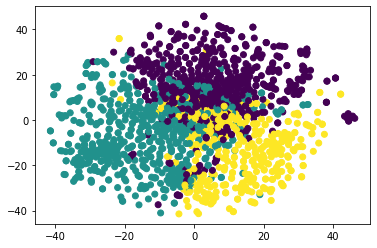

In [68]:
import matplotlib.pyplot as plt
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=groups_3.target)
plt.show()

Data points from the three topics are in different colors, such as green, purple, and yellow.
We can observe three clear clusters. Data points from the same topic are close to each
other, while those from different topics are far away. Obviously, count vectors are great
representations for original text data as they preserve the distinction among three different
topics.

In [76]:
data_tsne

array([[ -5.6897197,   4.6371236],
       [ -9.31033  ,  -7.1297297],
       [ -0.4250479,   2.1781652],
       ...,
       [ -0.7517416,   3.5821092],
       [-40.54841  , -10.107246 ],
       [-14.555732 ,  17.300179 ]], dtype=float32)

In [78]:
data_tsne[:,1]
#Learn more: https://stackoverflow.com/questions/16815928/what-does-mean-on-numpy-arrays 

array([  4.6371236,  -7.1297297,   2.1781652, ...,   3.5821092,
       -10.107246 ,  17.300179 ], dtype=float32)